# Classification

In [97]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self,k=3):
        self.k = k
        
    def fit(self,X_train,y_train):
        self.X = X_train
        self.y = y_train
        
    def predict(self,X_test):
        return np.array([self._predict(p) for p in X_test])
    
    def _predict(self,x):
        dist = [self.euclidean_distance(x,p) for p in self.X]
        ind = np.argsort(dist)[:self.k]
        classes = [self.y[i] for i in ind]
        pred = Counter(classes).most_common(1)[0][0]
        return pred
        
    def euclidean_distance(self,a,b):
        return (sum((a-b)**2))**.5

### Voronoi diagrams are cool
- [VO](http://paperjs.org/examples/voronoi/)
- [RO](http://cfbrasz.github.io/Voronoi.html)
- [NOI](https://observablehq.com/@d3/hover-voronoi)

In [37]:
reds_x = np.random.normal(0,1,400)
reds_y = np.random.normal(0,1,400)
blues_x = np.random.normal(2.5,1,400)
blues_y = np.random.normal(2.5,1,400)

In [38]:
X = np.array(list(zip(np.concatenate([reds_x,blues_x]), np.concatenate([reds_y,blues_y]))))

In [39]:
y = ["red"] * 400 + ["blue"] * 400

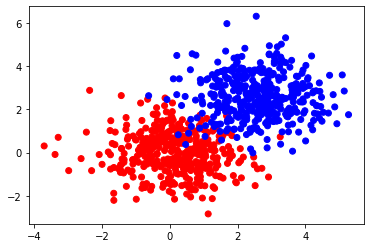

In [40]:
plt.scatter(X[:,0],X[:,1], c=y)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
knn = KNN(5)
knn.fit(X_train,y_train)

In [42]:
y_pred = knn.predict(X_test)

In [43]:
metrics = {
    "Acc":accuracy_score,
    "Prec":lambda gt,y: precision_score(gt,y),
    "Recall":lambda gt,y: recall_score(gt,y),
    "fscore":lambda gt,y: f1_score(gt,y)
}

In [90]:
for k,metric in metrics.items():
    print("-"*35)
    print(f"{k} : {metric(y_test_num,y_pred_num)}")
    print("-"*35)

-----------------------------------
Acc : 0.98
-----------------------------------
-----------------------------------
Prec : 0.9690721649484536
-----------------------------------
-----------------------------------
Recall : 0.9894736842105263
-----------------------------------
-----------------------------------
fscore : 0.9791666666666666
-----------------------------------


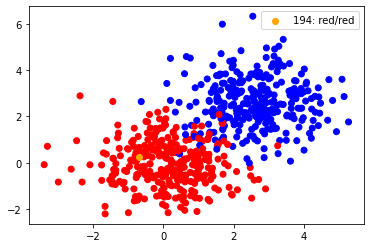

In [88]:
i = np.random.randint(0,len(X_test))
plt.scatter(X_train[:,0],X_train[:,1], c=y_train)
plt.scatter(X_test[i,0],X_test[i,1], c="orange", label=f"{i}: {y_pred[i]}/{y_test[i]}")
plt.legend()

In [92]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [93]:
for k,metric in metrics.items():
    print("-"*35)
    print(f"{k} : {metric(y_test_num,y_pred_num)}")
    print("-"*35)

-----------------------------------
Acc : 0.98
-----------------------------------
-----------------------------------
Prec : 0.9690721649484536
-----------------------------------
-----------------------------------
Recall : 0.9894736842105263
-----------------------------------
-----------------------------------
fscore : 0.9791666666666666
-----------------------------------


In [94]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)

In [100]:
conf = pd.DataFrame(conf,columns=set(y_train), index=set(y_train))
conf

,blue,red
blue,102,3
red,2,93


<AxesSubplot:>

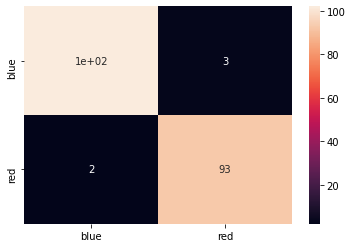

In [103]:
import seaborn as sns
sns.heatmap(conf, annot=True)

In [114]:
X,y = load_iris(return_X_y=True)
lb = load_iris()["target_names"]

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [106]:
model = KNN(k=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [107]:
metrics = {
    "Acc":accuracy_score,
    "Prec":lambda gt,y: precision_score(gt,y,average="weighted"),
    "Recall":lambda gt,y: recall_score(gt,y,average="weighted"),
    "fscore":lambda gt,y: f1_score(gt,y,average="weighted")
}

In [108]:
for k,metric in metrics.items():
    print("-"*35)
    print(f"{k} : {metric(y_test,y_pred)}")
    print("-"*35)

-----------------------------------
Acc : 0.9736842105263158
-----------------------------------
-----------------------------------
Prec : 0.975328947368421
-----------------------------------
-----------------------------------
Recall : 0.9736842105263158
-----------------------------------
-----------------------------------
fscore : 0.9736549382354663
-----------------------------------


In [115]:
conf = confusion_matrix(y_test, y_pred)
conf = pd.DataFrame(conf,columns=lb, index=lb)
conf

,setosa,versicolor,virginica
setosa,8,0,0
versicolor,0,14,1
virginica,0,0,15


<AxesSubplot:>

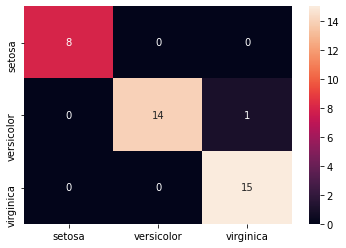

In [116]:
sns.heatmap(conf, annot=True)

# Converting labels to numeric

In [140]:
y_fict = ["cat"]*52+["dog"]*56+["horse"]*42

In [141]:
y_fict = np.random.choice(y_fict,len(y_fict))

In [142]:
{
    "cat":0,
    "dog":1,
    "horse":2
}

{'cat': 0, 'dog': 1, 'horse': 2}

In [143]:
from sklearn.preprocessing import LabelEncoder

In [144]:
lb_enc = LabelEncoder()

In [145]:
y_transform = lb_enc.fit_transform(y_fict)
y_transform

array([2, 0, 2, 1, 2, 1, 1, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0,
       0, 1, 1, 2, 0, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 2, 1, 1, 1, 0, 2,
       1, 1, 0, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 0, 0, 2, 1, 2, 0,
       2, 0, 1, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 2, 1,
       0, 2, 1, 1, 0, 0, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 2])

In [146]:
lb_enc.classes_

array(['cat', 'dog', 'horse'], dtype='<U5')

In [147]:
lb_enc.inverse_transform(y_transform)

array(['horse', 'cat', 'horse', 'dog', 'horse', 'dog', 'dog', 'cat',
       'dog', 'horse', 'cat', 'dog', 'cat', 'horse', 'cat', 'dog', 'cat',
       'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'horse', 'cat', 'dog',
       'dog', 'cat', 'horse', 'dog', 'dog', 'dog', 'dog', 'cat', 'horse',
       'horse', 'cat', 'cat', 'cat', 'horse', 'dog', 'cat', 'cat', 'cat',
       'cat', 'dog', 'dog', 'horse', 'cat', 'dog', 'horse', 'horse',
       'horse', 'horse', 'cat', 'horse', 'dog', 'horse', 'dog', 'cat',
       'horse', 'dog', 'dog', 'dog', 'cat', 'horse', 'dog', 'dog', 'cat',
       'dog', 'dog', 'horse', 'cat', 'horse', 'horse', 'cat', 'horse',
       'horse', 'dog', 'cat', 'horse', 'dog', 'cat', 'cat', 'horse',
       'dog', 'horse', 'cat', 'horse', 'cat', 'dog', 'cat', 'horse',
       'horse', 'dog', 'cat', 'dog', 'horse', 'cat', 'cat', 'horse',
       'cat', 'cat', 'cat', 'horse', 'dog', 'cat', 'horse', 'horse',
       'dog', 'cat', 'horse', 'dog', 'dog', 'cat', 'cat', 'horse', 'cat',
  

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X,y_fict)

In [169]:
encoder = LabelEncoder()

In [170]:
encoder.fit_transform(y_train)

array([0, 1, 0, 1, 2, 0, 0, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 2,
       2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 2, 0, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       2, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 1,
       1, 1])

In [171]:
encoder.classes_

array(['cat', 'dog', 'horse'], dtype='<U5')

In [172]:
y_test_fail = ["horse" if e=="dog" else e for e in y_test]
encoder.transform(y_test_fail)

array([2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0])

In [173]:
encoder.classes_

array(['cat', 'dog', 'horse'], dtype='<U5')

# Always use the same encoder for train and test!!!!!